In [2]:
import requests

tt = requests.get('http://192.168.1.3/waveshaper/getprofile')

In [4]:
tt

<Response [200]>

In [3]:
# check content in tt
tt.content

b'187.2750\t50.000\t0.0000\t1\n187.2760\t50.000\t0.0000\t1\n187.2770\t50.000\t0.0000\t1\n187.2780\t50.000\t0.0000\t1\n187.2790\t50.000\t0.0000\t1\n187.2800\t50.000\t0.0000\t1\n187.2810\t50.000\t0.0000\t1\n187.2820\t50.000\t0.0000\t1\n187.2830\t50.000\t0.0000\t1\n187.2840\t50.000\t0.0000\t1\n187.2850\t50.000\t0.0000\t1\n187.2860\t50.000\t0.0000\t1\n187.2870\t50.000\t0.0000\t1\n187.2880\t50.000\t0.0000\t1\n187.2890\t50.000\t0.0000\t1\n187.2900\t50.000\t0.0000\t1\n187.2910\t50.000\t0.0000\t1\n187.2920\t50.000\t0.0000\t1\n187.2930\t50.000\t0.0000\t1\n187.2940\t50.000\t0.0000\t1\n187.2950\t50.000\t0.0000\t1\n187.2960\t50.000\t0.0000\t1\n187.2970\t50.000\t0.0000\t1\n187.2980\t50.000\t0.0000\t1\n187.2990\t50.000\t0.0000\t1\n187.3000\t50.000\t0.0000\t1\n187.3010\t50.000\t0.0000\t1\n187.3020\t50.000\t0.0000\t1\n187.3030\t50.000\t0.0000\t1\n187.3040\t50.000\t0.0000\t1\n187.3050\t50.000\t0.0000\t1\n187.3060\t50.000\t0.0000\t1\n187.3070\t50.000\t0.0000\t1\n187.3080\t50.000\t0.0000\t1\n187.3090\t50

In [5]:
# Extract data from tt, 4 columns separated by \t
data = tt.content.decode().split('\n')
# need convert str to float
data = [x.split('\t') for x in data if x]
data = [[float(x) for x in y] for y in data]


In [6]:
data

[[187.275, 50.0, 0.0, 1.0],
 [187.276, 50.0, 0.0, 1.0],
 [187.277, 50.0, 0.0, 1.0],
 [187.278, 50.0, 0.0, 1.0],
 [187.279, 50.0, 0.0, 1.0],
 [187.28, 50.0, 0.0, 1.0],
 [187.281, 50.0, 0.0, 1.0],
 [187.282, 50.0, 0.0, 1.0],
 [187.283, 50.0, 0.0, 1.0],
 [187.284, 50.0, 0.0, 1.0],
 [187.285, 50.0, 0.0, 1.0],
 [187.286, 50.0, 0.0, 1.0],
 [187.287, 50.0, 0.0, 1.0],
 [187.288, 50.0, 0.0, 1.0],
 [187.289, 50.0, 0.0, 1.0],
 [187.29, 50.0, 0.0, 1.0],
 [187.291, 50.0, 0.0, 1.0],
 [187.292, 50.0, 0.0, 1.0],
 [187.293, 50.0, 0.0, 1.0],
 [187.294, 50.0, 0.0, 1.0],
 [187.295, 50.0, 0.0, 1.0],
 [187.296, 50.0, 0.0, 1.0],
 [187.297, 50.0, 0.0, 1.0],
 [187.298, 50.0, 0.0, 1.0],
 [187.299, 50.0, 0.0, 1.0],
 [187.3, 50.0, 0.0, 1.0],
 [187.301, 50.0, 0.0, 1.0],
 [187.302, 50.0, 0.0, 1.0],
 [187.303, 50.0, 0.0, 1.0],
 [187.304, 50.0, 0.0, 1.0],
 [187.305, 50.0, 0.0, 1.0],
 [187.306, 50.0, 0.0, 1.0],
 [187.307, 50.0, 0.0, 1.0],
 [187.308, 50.0, 0.0, 1.0],
 [187.309, 50.0, 0.0, 1.0],
 [187.31, 50.0, 0.0, 1.0

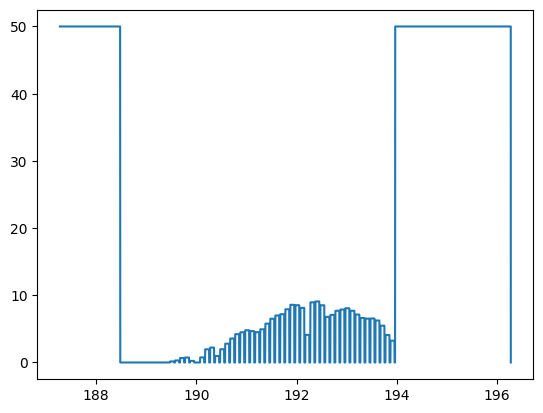

In [8]:
import matplotlib.pyplot as plt

# plot second column over first column
plt.plot([x[0] for x in data], [x[1] for x in data])

In [23]:
import warnings

class GridConfig:
    # Define default values for grid configuration
    DEFAULTS = {
        "matrixsize_0": 10,
        "matrixsize_1": 10,
        "elem_width": 8,
        "elem_height": 6,
        "topleft_x": 920,
        "topleft_y": 585,
        "gap_x": 2,
        "gap_y": 1
    }

    def __init__(self, config=None):
        # Initialize with provided config or empty dictionary
        if config is None:
            config = {}
        self.config = config

    def __getitem__(self, key):
        # Return the value if it exists, otherwise the default value and raise a warning
        if key in self.config:
            return self.config[key]
        elif key in self.DEFAULTS:
            # warnings.warn(f"Key '{key}' is missing. Using default value: {self.DEFAULTS[key]}")
            return self.DEFAULTS[key]
        else:
            raise KeyError(f"Key '{key}' is not a valid configuration key. Valid keys are: {list(self.grid_config.keys())}")

    def __setitem__(self, key, value):
        # Set the value for the specified key
        self.config[key] = value

    def __repr__(self):
        # Return the string representation of the configuration
        return repr(self.grid_config)

    @property
    def grid_config(self):
        # Return the entire configuration, merging defaults with user-defined values
        return {**self.DEFAULTS, **self.config}
    
    def update_config(self, new_config):
        # Update the configuration with a new dictionary
        if isinstance(new_config, dict):
            self.config.update(new_config)  # Merge the new dictionary with existing config
        elif isinstance(new_config, GridConfig):
            self.config.update(new_config.config)  # Merge from another GridConfig object
        else:
            raise TypeError("New configuration must be a dictionary or a GridConfig object.")

    def __call__(self, new_config):
        # Allow direct assignment with a dictionary or another GridConfig object
        self.update_config(new_config)


# Usage
grid_config_slm2 = GridConfig({
    "matrixsize_0": 20,  # Override default value
    "elem_width": 10     # Override default value
})

# Accessing configuration values
print("Matrix Size 0:", grid_config_slm2["matrixsize_0"])
print("Matrix Size 1:", grid_config_slm2["matrixsize_1"])  # Default value
print("Element Width:", grid_config_slm2["elem_width"])

# Access the entire grid configuration
print("Grid Configuration:", grid_config_slm2.grid_config)


Matrix Size 0: 20
Matrix Size 1: 10
Element Width: 10
Grid Configuration: {'matrixsize_0': 20, 'matrixsize_1': 10, 'elem_width': 10, 'elem_height': 6, 'topleft_x': 920, 'topleft_y': 585, 'gap_x': 2, 'gap_y': 1}


In [24]:
grid_config_slm2["zfe"]='jnuh'

In [25]:
grid_config_slm2

{'matrixsize_0': 20, 'matrixsize_1': 10, 'elem_width': 10, 'elem_height': 6, 'topleft_x': 920, 'topleft_y': 585, 'gap_x': 2, 'gap_y': 1, 'zfe': 'jnuh'}

In [26]:
grid_config_slm2({'matrixsize_0': 25})
grid_config_slm2

{'matrixsize_0': 25, 'matrixsize_1': 10, 'elem_width': 10, 'elem_height': 6, 'topleft_x': 920, 'topleft_y': 585, 'gap_x': 2, 'gap_y': 1, 'zfe': 'jnuh'}

In [27]:
for key, value in grid_config_slm2.items():
    print(f"{key}: {value}")

AttributeError: 'GridConfig' object has no attribute 'items'

In [46]:
class GridConfig(dict):
    # Define keys for grid configuration
    DEFAULTS = {
        "matrixsize_0": None,
        "matrixsize_1": None,
        "elem_width": None,
        "elem_height": None,
        "topleft_x": None,
        "topleft_y": None,
        "gap_x": None,
        "gap_y": None
    }

    def __init__(self, config=None):
        # Initialize with provided config or empty dictionary
        if config is None:
            config = {}
        self.config = config
        super().__init__(self.grid_config)

    def __getitem__(self, key):
        # Return the value if it exists, otherwise the default value
        if key in self.config:
            return self.config[key]
        elif key in self.DEFAULTS:
            return self.DEFAULTS[key]
        else:
            raise KeyError(f"Key '{key}' is not a valid configuration key. Valid keys are: {list(self.grid_config.keys())}")

    def __setitem__(self, key, value):
        # Set the value for the specified key
        self.config[key] = value
        super().__setitem__(key, value)

    def __repr__(self):
        # Return the string representation of the configuration
        return '\n'.join([f"{key}: {value}" for key, value in self.items()])

    @property
    def grid_config(self):
        # Return the entire configuration, merging defaults with user-defined values
        return {**self.DEFAULTS, **self.config}
    
    def update_config(self, new_config):
        # Update the configuration with a new dictionary
        if isinstance(new_config, dict):
            self.config.update(new_config)  # Merge the new dictionary with existing config
        elif isinstance(new_config, GridConfig):
            self.config.update(new_config.config)  # Merge from another GridConfig object
        else:
            raise TypeError("New configuration must be a dictionary or a GridConfig object.")

    def __call__(self, new_config):
        # Allow direct assignment with a dictionary or another GridConfig object
        self.update_config(new_config)

    def keys_None(self):
        # Return the necessary keys that are still None
        return [key for key in self.DEFAULTS if self[key] is None]
    
    def has_needed_keys(self):
        # Check if all necessary keys have been set
        return all(self[key] is not None for key in self.DEFAULTS)


# Usage
grid_config_slm1 = GridConfig({
    "matrixsize_0": 20,  # Override default value
    "elem_width": 10     # Override default value
})

grid_config_slm2 = GridConfig({
    "matrixsize_1": 15,  # Override default value
    "topleft_x": 1000
})

# Check type
print(isinstance(grid_config_slm1, dict))  # Should return True

# Access the entire grid configuration
print("Grid Configuration SLM1:", grid_config_slm1.grid_config)
print("Grid Configuration SLM2:", grid_config_slm2.grid_config)

# Update configuration with a new dictionary using assignment-like syntax
new_config = {
    "matrixsize_0": 25,
    "gap_y": 3
}
grid_config_slm1(new_config)  # Update existing config with new values

# Update configuration with another GridConfig object
grid_config_slm2(grid_config_slm1)  # Merge config from grid_config_slm1 to grid_config_slm2

# Access updated values
print("Updated Grid Configuration SLM1:", grid_config_slm1.grid_config)
print("Updated Grid Configuration SLM2:", grid_config_slm2.grid_config)

# Check keys that are None
print("Keys with None in SLM1:", grid_config_slm1.keys_None())

# Check if all necessary keys are set
print("SLM1 has all needed keys:", grid_config_slm1.has_needed_keys())
print("SLM2 has all needed keys:", grid_config_slm2.has_needed_keys())

# Attempt to access an invalid key
try:
    print(grid_config_slm1["invalid_key"])
except KeyError as e:
    print(e)


True
Grid Configuration SLM1: {'matrixsize_0': 20, 'matrixsize_1': None, 'elem_width': 10, 'elem_height': None, 'topleft_x': None, 'topleft_y': None, 'gap_x': None, 'gap_y': None}
Grid Configuration SLM2: {'matrixsize_0': None, 'matrixsize_1': 15, 'elem_width': None, 'elem_height': None, 'topleft_x': 1000, 'topleft_y': None, 'gap_x': None, 'gap_y': None}
Updated Grid Configuration SLM1: {'matrixsize_0': 25, 'matrixsize_1': None, 'elem_width': 10, 'elem_height': None, 'topleft_x': None, 'topleft_y': None, 'gap_x': None, 'gap_y': 3}
Updated Grid Configuration SLM2: {'matrixsize_0': 20, 'matrixsize_1': None, 'elem_width': 10, 'elem_height': None, 'topleft_x': None, 'topleft_y': None, 'gap_x': None, 'gap_y': None}
Keys with None in SLM1: ['matrixsize_1', 'elem_height', 'topleft_x', 'topleft_y', 'gap_x']
SLM1 has all needed keys: False
SLM2 has all needed keys: False
"Key 'invalid_key' is not a valid configuration key. Valid keys are: ['matrixsize_0', 'matrixsize_1', 'elem_width', 'elem_hei

In [47]:
for key, value in grid_config_slm1.items():
    print(f"{key}: {value}")

matrixsize_0: 20
matrixsize_1: None
elem_width: 10
elem_height: None
topleft_x: None
topleft_y: None
gap_x: None
gap_y: None


In [48]:
grid_config_slm1['gap_x']=3
grid_config_slm1

matrixsize_0: 20
matrixsize_1: None
elem_width: 10
elem_height: None
topleft_x: None
topleft_y: None
gap_x: 3
gap_y: None

In [49]:
grid_config_slm2 = GridConfig()

for key in grid_config_slm2.items():
    print(key)

('matrixsize_0', None)
('matrixsize_1', None)
('elem_width', None)
('elem_height', None)
('topleft_x', None)
('topleft_y', None)
('gap_x', None)
('gap_y', None)


In [33]:
isinstance(grid_config_slm2, dict)

True

In [35]:
grid_config_slm2.items()

dict_items([])